In [1]:
import dtreeviz
import pandas as pd
from graphviz import Source
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [2]:
clear_df = pd.read_csv('../readyDatasets/preprocessed_dataframe.csv')

In [3]:
X = clear_df.drop(columns='УСЬОГО')
y = clear_df['УСЬОГО']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [4]:
decision_tree = DecisionTreeRegressor(random_state=1)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 score:", r2)

MSE: 133.23851590106008
R2 score: 0.9141329161159645


parameters = {"max_depth": np.arange(2, 30, 2),
              "min_samples_leaf": np.arange(1, 20),
              "max_features": ["log2", "sqrt", 15, 20, 22, None],
              "max_leaf_nodes": [None, 50, 100, 200, 300, 500, 1000]}

computation time: 2733.53
{'max_depth': 26, 'max_features': 15, 'max_leaf_nodes': 300, 'min_samples_leaf': 2}

mse score: 112.53
r2 score: 0.93

*These results were not reproducible. The R2 varied from 0.87 to 0.94 from time to time.
Worse results were received trying to tune with fixed random_state, so it was decided to leave only the basic model.*

In [9]:
export_graphviz(decision_tree, out_file='tree_structure.dot', feature_names=X_train.columns)

In [10]:
temp = open('tree_structure.dot', encoding="utf8").read()
s = Source(temp, filename="tree_structure")
s.view()

'tree_structure.pdf'

In [11]:
viz_model = dtreeviz.model(decision_tree, X_train, y_train, feature_names=list(X_train.columns.values), target_name="УСЬОГО")
v = viz_model.view()
v.save("dtreeviz.svg")

C:\Users\natan.chachko\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


Text(0.5, 1.0, 'Feature Importance')

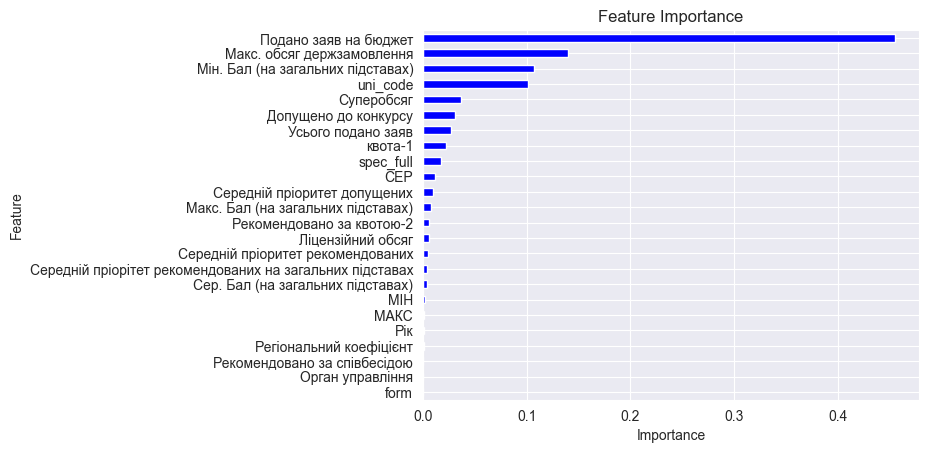

In [29]:
importances = pd.Series(decision_tree.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=True, inplace=True)
importances.plot.barh(color='blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")

In [30]:
importances.sort_values(ascending=False)

Подано заяв на бюджет                                       0.455606
Макс. обсяг держзамовлення                                  0.140130
Мін. Бал (на загальних підставах)                           0.106858
uni_code                                                    0.101308
Суперобсяг                                                  0.037011
Допущено до конкурсу                                        0.030733
Усього подано заяв                                          0.027469
квота-1                                                     0.022360
spec_full                                                   0.017845
СЕР                                                         0.011979
Середній пріоритет допущених                                0.009596
Макс. Бал (на загальних підставах)                          0.007533
Рекомендовано за квотою-2                                   0.006317
Ліцензійний обсяг                                           0.006284
Середній пріоритет рекомендованих 